In [1]:
import seaborn as sns


In [2]:
import numpy as np
import sys
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import mplt_style_n

plt.style.use(mplt_style_n.style1)

In [3]:
import WaterQualityFunction_plot as wqfp
import WaterQualityFunction_nutrient as wqfn

In [4]:
import WaterQualityFunction_preprocessing as wqfpr

In [5]:
import util as util

In [6]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [7]:
df = pd.read_csv('govdat.csv', low_memory=False)

In [8]:
set(np.unique(df["determinand.definition"]))

{'PAH : Total : Dry Wt :- {Polynuclear Aromatic Hydrocarbons}',
 'Calcium, Dissolved',
 'Equiv.Carbon No >25-40, Aromatic Fraction',
 'PCB - 018',
 'IR Scan',
 'Fenitrothion',
 '2,2,4,4,5-Pentabromodiphenyl ether :- {PBDE 99}',
 'Nitrogen : Dry Wt % as N',
 'Hexafluoropropylene oxide trimer acid',
 'Nitrobenzene',
 'PCB - 123 : Wet Wt',
 'Mercury : Dry Wt',
 'River flow status',
 'trans-Heptachlor epoxide : Wet Wt',
 'Dichloromethane :- {Methylene Dichloride}',
 'Equiv.Carbon No >21-35, Aliphatic fraction : Dry Wt',
 'Perfluorobutanoic acid',
 'Dibenzothiophenes : C2 : Wet Wt',
 'Dimethyl phthalate',
 'Lithium : HF Digest : Dry Wt',
 '2,3,5,6-Tetrachlorophenol : Dry Wt',
 'Perfluorononanoic acid',
 'Grain Size Fraction : phi 1.0 to 1.5',
 'Di-n-octylphthalate',
 'n-ButylBenzene : Dry Wt :- {1-Phenylbutane}',
 'Sample Matrix',
 '2,2,4,4,5 Pentabromodiphenyl Ether: Wet Wt',
 'Ethylbenzene Leachable',
 'Transparency, visual, Non Secchi',
 'Grain Size Fraction : phi 3.5 to 4.0',
 'Weather 

In [9]:
water_properties = ['Volume of Sample Filtered',\
                   'Borehole : Depth to liquid :- {Ground level to liquid}', "River flow status", \
                    "Weather : Rainfall : Coded",\
                   'Unusual Weather Waiver (WRA)', 'Sample Depth below surface', \
                    'Salinity', 'Salinity : Calculated from Chloride', 'Salinity : In Situ','Salinity : Refractometer : Intertidal, Interstitial',\
 'Salinity, by Bench Salinometer', 'Salinity, by Conductivity',  'Time of high tide','Temperature of Water',\
 'Time of sampling relative to previous high water',  'Water Depth',
 'Water Level Below top cover',
 'Water level above OD']

In [10]:
nutrients_N = [119,111,9993,117,9853,118,6485,4925,114,116,9943,9686 ] #12 determinands linked to the Nitrogen

In [11]:
nutrients_N_name = ["Ammonia un-ionised as N", "Ammoniacal Nitrogen as N", "Ammoniacal Nitrogen, Filtered as N",\
                    "Nitrate as N","Nitrate, Filtered as N", \
                    "Nitrite as N","Nitrite, Filtered as N", \
                    "Nitrogen, Dissolved Inorganic : as N",\
                     "Nitrogen, Kjeldahl as N", \
                    "Nitrogen, Total Oxidised as N",\
                     "Nitrogen, Total Oxidised, Filtered as N", "Nitrogen, Total as N "]


# 0) subset of the dataset-time,place,water info, and nitrogen determinants

In [12]:
df.loc[:,"Date"] = pd.to_datetime(df['sample.sampleDateTime']).dt.date


In [13]:
df_sub = df.loc[(df['determinand.definition'].isin(water_properties)) | (df['determinand.definition'].isin(nutrients_N_name)) ][["sample.samplingPoint.notation", "determinand.definition","result","resultQualifier.notation", "sample.sampledMaterialType.label", "month", "yr", "Date", "lat", "lon"]]



# 1) Analysis of frequency of water definition in the catalogue

In [14]:
set(np.unique(df_sub["sample.sampledMaterialType.label"]))

{'ANY BIOTA',
 'ANY LEACHATE',
 'ANY NON-AQUEOUS LIQUID',
 'ANY SEWAGE',
 'ANY SEWAGE SLUDGE',
 'ANY SOLID/SEDIMENT - UNSPECIFIED',
 'ANY TRADE EFFLUENT',
 'ANY WATER',
 'CANAL WATER',
 'CERASTODERMA EDULE - COCKLE - WHOLE ANIMAL',
 'COASTAL / MARINE SEDIMENT',
 'COASTAL / MARINE SEDIMENT - <63UM FRACTION',
 'CRUDE SEWAGE',
 'ESTUARINE WATER',
 'ESTUARINE WATER AT HIGH TIDE',
 'ESTUARY SEDIMENT',
 'ESTUARY SEDIMENT - <63UM FRACTION',
 'ESTUARY SEDIMENT - INTER TIDAL',
 'ESTUARY SEDIMENT - INTER TIDAL - <63UM FRACTION',
 'ESTUARY SEDIMENT - SUB TIDAL',
 'FINAL SEWAGE EFFLUENT',
 'GROUNDWATER',
 'GROUNDWATER - PURGED/PUMPED/REFILLED',
 'MYTILUS EDULIS - MUSSEL - WHOLE ANIMAL',
 'OSTEREA EDULIS - NATIVE OYSTER - WHOLE ANIMAL',
 'POND / LAKE / RESERVOIR WATER',
 'PRECIPITATION',
 'RIVER / RUNNING SURFACE WATER',
 'RUNNING SURFACE WATER SEDIMENT',
 'RUNNING SURFACE WATER SEDIMENT - <63UM FRACTION',
 'SEA WATER',
 'STORM SEWER OVERFLOW DISCHARGE',
 'STORM TANK EFFLUENT',
 'SURFACE DRAINAGE',

In [15]:
df_sub.groupby(["sample.sampledMaterialType.label"]).count().sort_values(by="sample.samplingPoint.notation", ascending=False)["sample.samplingPoint.notation"]#.index.get_level_values("sample.sampledMaterialType.label")

sample.sampledMaterialType.label
RIVER / RUNNING SURFACE WATER                      481491
FINAL SEWAGE EFFLUENT                              163838
ESTUARINE WATER                                    109869
SEA WATER                                          101507
ANY TRADE EFFLUENT                                  26890
GROUNDWATER                                         21952
SURFACE DRAINAGE                                     7617
POND / LAKE / RESERVOIR WATER                        6475
ANY SEWAGE                                           4455
ANY WATER                                            3998
UNCODED                                              2628
CANAL WATER                                          2361
CRUDE SEWAGE                                         2218
TRADE EFFLUENT - FRESHWATER RETURNED ABSTRACTED      2183
COASTAL / MARINE SEDIMENT                            1278
ESTUARINE WATER AT HIGH TIDE                         1010
COASTAL / MARINE SEDIMENT - <63UM FRACT

In [16]:
water_names = df_sub.groupby(["sample.sampledMaterialType.label"]).count().sort_values(by="sample.samplingPoint.notation", ascending=False)["sample.samplingPoint.notation"].index.get_level_values("sample.sampledMaterialType.label")

In [17]:
frequency = df_sub[["yr", "sample.sampledMaterialType.label"]]

In [18]:
data = frequency.groupby(["yr","sample.sampledMaterialType.label"]).size()


In [19]:
from matplotlib import cm


In [20]:
colors = cm.rainbow(np.linspace(0, 1, len(np.unique(df_sub["sample.sampledMaterialType.label"]))))



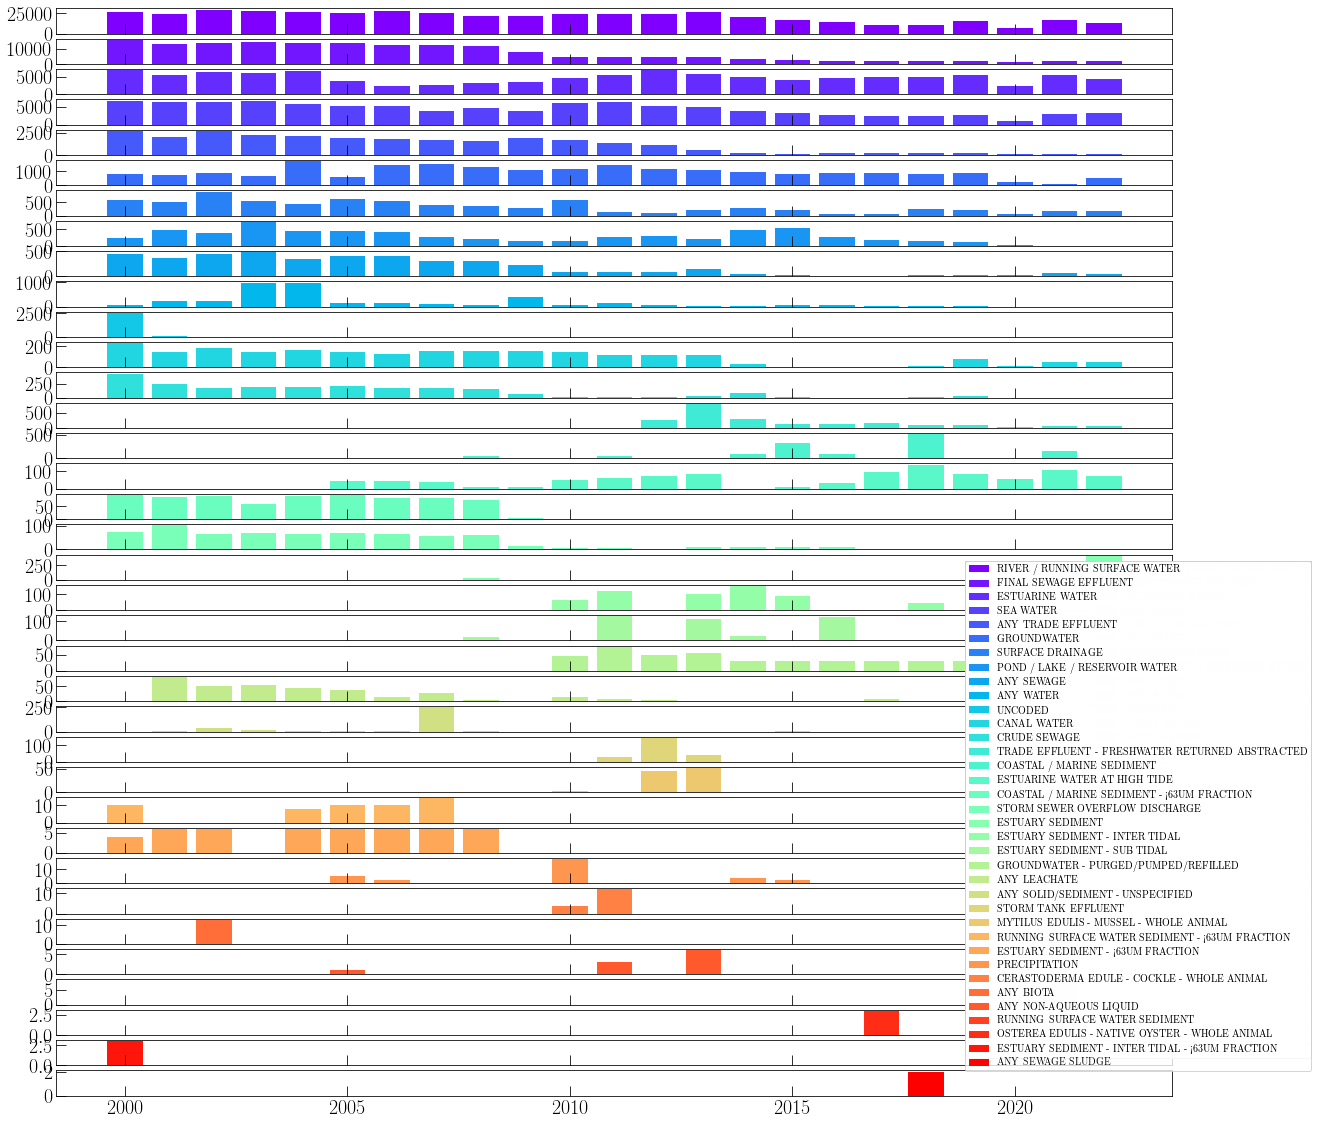

In [21]:
    fig, axes = plt.subplots(nrows=len(water_names),ncols=1, sharex=True, figsize=(20,20))
    for i in range(len(water_names)):
        axes[i].bar(data[(data.index.get_level_values("sample.sampledMaterialType.label") == \
                          water_names[i])].index.get_level_values('yr'), \
                    data.loc[(data.index.get_level_values("sample.sampledMaterialType.label") ==\
                             water_names[i])].values, label = water_names[i], color=colors[i])
        fig.legend(bbox_to_anchor=(1., .5))
        fig.set_facecolor("w")

        plt.savefig('WaterType_frequency.png', bbox_inches='tight',  transparent=False)


# 3) Pivoting the dataset to convert rows in columns

In [22]:


df_sub_piv = df_sub.pivot_table('result', ["sample.samplingPoint.notation", "sample.sampledMaterialType.label", \
                                           "month", "yr", "Date", "lat", "lon"], 'determinand.definition').reset_index().rename_axis(None, axis=1)



In [23]:
df_sub_piv = df_sub_piv.sort_values(by="Date", ascending=True)

# 4) Encoding water and season

In [24]:
df_sub_piv = df_sub_piv.rename(columns={"sample.sampledMaterialType.label": "water"})

In [25]:
df_sub_piv = df_sub_piv.rename(columns={"sample.samplingPoint.notation": "place"})

In [26]:
df_sub_piv

,place,water,month,yr,Date,lat,lon,Ammonia un-ionised as N,Ammoniacal Nitrogen as N,"Ammoniacal Nitrogen, Filtered as N",...,Sample Depth below surface,Temperature of Water,Time of high tide,Time of sampling relative to previous high water,Unusual Weather Waiver (WRA),Volume of Sample Filtered,Water Depth,Water Level Below top cover,Water level above OD,Weather : Rainfall : Coded
31913,SO-F0002151,RIVER / RUNNING SURFACE WATER,1,2000,2000-01-04,0.037124,50.914881,0.0010,0.157,NaN,...,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87609,SO-F0011446,FINAL SEWAGE EFFLUENT,1,2000,2000-01-04,-0.390159,51.139273,0.0094,1.380,NaN,...,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78415,SO-F0003200,FINAL SEWAGE EFFLUENT,1,2000,2000-01-04,-0.343427,51.142937,0.0367,12.000,NaN,...,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78583,SO-F0003228,FINAL SEWAGE EFFLUENT,1,2000,2000-01-04,-0.365905,51.146041,0.0076,1.250,NaN,...,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78713,SO-F0003230,FINAL SEWAGE EFFLUENT,1,2000,2000-01-04,-0.353276,51.171494,0.0094,3.080,NaN,...,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92402,SO-F0017448,SEA WATER,9,2022,2022-09-20,-0.669417,50.782353,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,995.0,NaN,NaN,NaN,NaN
17371,SO-F0001925,SEA WATER,9,2022,2022-09-20,-0.691349,50.779246,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,995.0,NaN,NaN,NaN,NaN
93546,SO-F0017484,SEA WATER,9,2022,2022-09-20,0.585767,50.853548,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,960.0,NaN,NaN,NaN,NaN
94295,SO-F0017527,RIVER / RUNNING SURFACE WATER,9,2022,2022-09-20,0.591809,50.867184,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,730.0,NaN,NaN,NaN,NaN


In [27]:
df_sub_piv_enc = pd.get_dummies(df_sub_piv, columns=["water"])

In [28]:
df_sub_piv_enc["season"] = np.where((df_sub_piv_enc["month"]>4)&(df_sub_piv_enc["month"]<9), 0, 1)

In [29]:
df_sub_piv_enc

,place,month,yr,Date,lat,lon,Ammonia un-ionised as N,Ammoniacal Nitrogen as N,"Ammoniacal Nitrogen, Filtered as N",Borehole : Depth to liquid :- {Ground level to liquid},...,water_RIVER / RUNNING SURFACE WATER,water_RUNNING SURFACE WATER SEDIMENT,water_RUNNING SURFACE WATER SEDIMENT - <63UM FRACTION,water_SEA WATER,water_STORM SEWER OVERFLOW DISCHARGE,water_STORM TANK EFFLUENT,water_SURFACE DRAINAGE,water_TRADE EFFLUENT - FRESHWATER RETURNED ABSTRACTED,water_UNCODED,season
31913,SO-F0002151,1,2000,2000-01-04,0.037124,50.914881,0.0010,0.157,NaN,NaN,...,1,0,0,0,0,0,0,0,0,1
87609,SO-F0011446,1,2000,2000-01-04,-0.390159,51.139273,0.0094,1.380,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
78415,SO-F0003200,1,2000,2000-01-04,-0.343427,51.142937,0.0367,12.000,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
78583,SO-F0003228,1,2000,2000-01-04,-0.365905,51.146041,0.0076,1.250,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
78713,SO-F0003230,1,2000,2000-01-04,-0.353276,51.171494,0.0094,3.080,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92402,SO-F0017448,9,2022,2022-09-20,-0.669417,50.782353,NaN,NaN,NaN,NaN,...,0,0,0,1,0,0,0,0,0,1
17371,SO-F0001925,9,2022,2022-09-20,-0.691349,50.779246,NaN,NaN,NaN,NaN,...,0,0,0,1,0,0,0,0,0,1
93546,SO-F0017484,9,2022,2022-09-20,0.585767,50.853548,NaN,NaN,NaN,NaN,...,0,0,0,1,0,0,0,0,0,1
94295,SO-F0017527,9,2022,2022-09-20,0.591809,50.867184,NaN,NaN,NaN,NaN,...,1,0,0,0,0,0,0,0,0,1


# 5) NaNs analysis

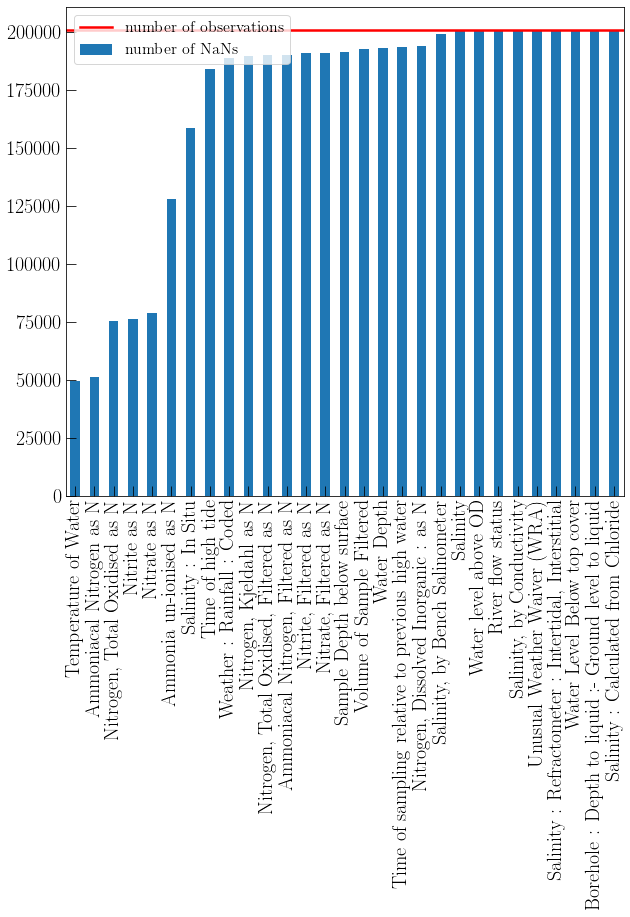

In [30]:
missing = df_sub_piv_enc.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
f, ax = plt.subplots(figsize=(10,9))


missing.plot.bar(label="number of NaNs");
plt.axhline(y=200886, color="red", label="number of observations")
plt.legend(fontsize=16)

In [31]:
# Asking less then 50% being NaNs

In [32]:
df_sub_piv_nans = df_sub_piv_enc.dropna(thresh=df_sub_piv_enc.shape[0]*0.10,axis=1)

In [33]:
df_sub_piv_nans

,place,month,yr,Date,lat,lon,Ammonia un-ionised as N,Ammoniacal Nitrogen as N,Nitrate as N,Nitrite as N,...,water_RIVER / RUNNING SURFACE WATER,water_RUNNING SURFACE WATER SEDIMENT,water_RUNNING SURFACE WATER SEDIMENT - <63UM FRACTION,water_SEA WATER,water_STORM SEWER OVERFLOW DISCHARGE,water_STORM TANK EFFLUENT,water_SURFACE DRAINAGE,water_TRADE EFFLUENT - FRESHWATER RETURNED ABSTRACTED,water_UNCODED,season
31913,SO-F0002151,1,2000,2000-01-04,0.037124,50.914881,0.0010,0.157,3.83,0.0327,...,1,0,0,0,0,0,0,0,0,1
87609,SO-F0011446,1,2000,2000-01-04,-0.390159,51.139273,0.0094,1.380,5.95,0.1500,...,0,0,0,0,0,0,0,0,0,1
78415,SO-F0003200,1,2000,2000-01-04,-0.343427,51.142937,0.0367,12.000,0.90,0.1000,...,0,0,0,0,0,0,0,0,0,1
78583,SO-F0003228,1,2000,2000-01-04,-0.365905,51.146041,0.0076,1.250,9.05,0.3500,...,0,0,0,0,0,0,0,0,0,1
78713,SO-F0003230,1,2000,2000-01-04,-0.353276,51.171494,0.0094,3.080,7.57,0.3300,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92402,SO-F0017448,9,2022,2022-09-20,-0.669417,50.782353,NaN,NaN,NaN,NaN,...,0,0,0,1,0,0,0,0,0,1
17371,SO-F0001925,9,2022,2022-09-20,-0.691349,50.779246,NaN,NaN,NaN,NaN,...,0,0,0,1,0,0,0,0,0,1
93546,SO-F0017484,9,2022,2022-09-20,0.585767,50.853548,NaN,NaN,NaN,NaN,...,0,0,0,1,0,0,0,0,0,1
94295,SO-F0017527,9,2022,2022-09-20,0.591809,50.867184,NaN,NaN,NaN,NaN,...,1,0,0,0,0,0,0,0,0,1


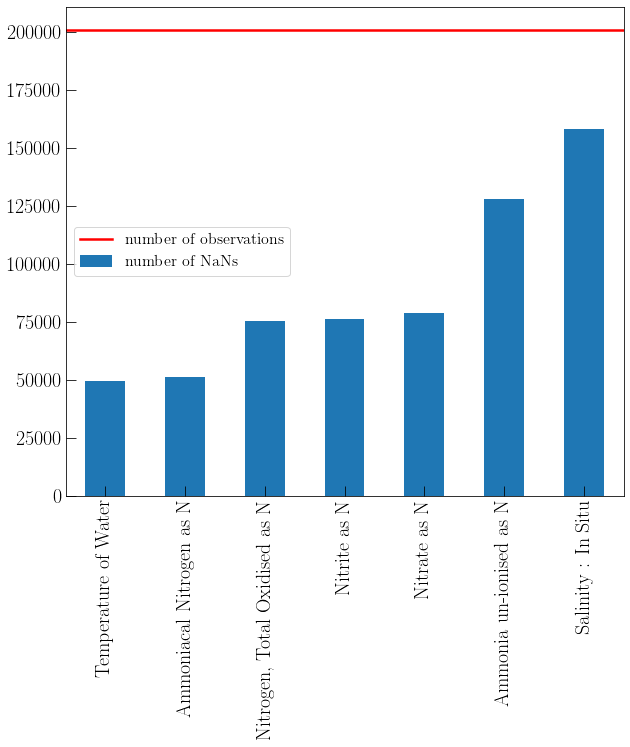

In [34]:
missing = df_sub_piv_nans.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
f, ax = plt.subplots(figsize=(10,9))


missing.plot.bar(label="number of NaNs");
plt.axhline(y=200886, color="red", label="number of observations")
plt.legend(fontsize=16)

# 6) Excluding outliers based on quantiles

In [35]:
df_sub_piv_nans.iloc[:, 5::]

,lon,Ammonia un-ionised as N,Ammoniacal Nitrogen as N,Nitrate as N,Nitrite as N,"Nitrogen, Total Oxidised as N",Salinity : In Situ,Temperature of Water,water_ANY BIOTA,water_ANY LEACHATE,...,water_RIVER / RUNNING SURFACE WATER,water_RUNNING SURFACE WATER SEDIMENT,water_RUNNING SURFACE WATER SEDIMENT - <63UM FRACTION,water_SEA WATER,water_STORM SEWER OVERFLOW DISCHARGE,water_STORM TANK EFFLUENT,water_SURFACE DRAINAGE,water_TRADE EFFLUENT - FRESHWATER RETURNED ABSTRACTED,water_UNCODED,season
31913,50.914881,0.0010,0.157,3.83,0.0327,3.86,NaN,8.0,0,0,...,1,0,0,0,0,0,0,0,0,1
87609,51.139273,0.0094,1.380,5.95,0.1500,6.10,NaN,9.0,0,0,...,0,0,0,0,0,0,0,0,0,1
78415,51.142937,0.0367,12.000,0.90,0.1000,1.00,NaN,9.0,0,0,...,0,0,0,0,0,0,0,0,0,1
78583,51.146041,0.0076,1.250,9.05,0.3500,9.40,NaN,9.0,0,0,...,0,0,0,0,0,0,0,0,0,1
78713,51.171494,0.0094,3.080,7.57,0.3300,7.90,NaN,9.0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92402,50.782353,NaN,NaN,NaN,NaN,NaN,34.62,NaN,0,0,...,0,0,0,1,0,0,0,0,0,1
17371,50.779246,NaN,NaN,NaN,NaN,NaN,34.64,NaN,0,0,...,0,0,0,1,0,0,0,0,0,1
93546,50.853548,NaN,NaN,NaN,NaN,NaN,35.20,NaN,0,0,...,0,0,0,1,0,0,0,0,0,1
94295,50.867184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,...,1,0,0,0,0,0,0,0,0,1


In [36]:
def outliers(df, quantile_low, quantile_up):

    q_low = df.iloc[:, 5::].quantile(quantile_low)
    q_hi  = df.iloc[:, 5::].quantile(quantile_up)

    report_dataframe_out = df.copy()

    report_dataframe_out.iloc[:, 5::] = df[(df.iloc[:, 5::] < q_hi) & (df.iloc[:, 5::]> q_low)].iloc[:, 5::]
    return report_dataframe_out

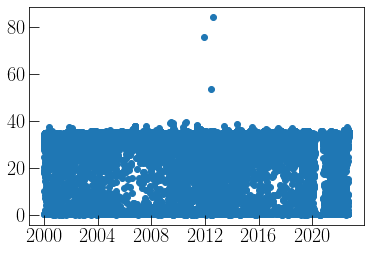

In [37]:
plt.scatter(df_sub_piv_nans["Date"], df_sub_piv_nans["Salinity : In Situ"])


In [38]:
df_sub_piv_nans_out = outliers(df_sub_piv_nans, 0.01, 0.99)

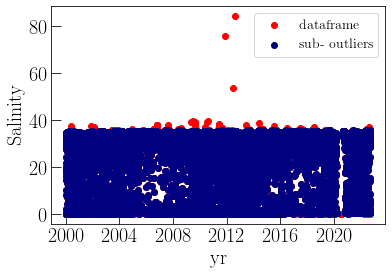

In [39]:
plt.scatter(df_sub_piv_nans["Date"], df_sub_piv_nans["Salinity : In Situ"], label="dataframe", color="red")
plt.scatter(df_sub_piv_nans_out["Date"], df_sub_piv_nans_out["Salinity : In Situ"], label="sub- outliers", color="navy")
plt.xlabel("yr")
plt.ylabel("Salinity")
plt.legend(fontsize = 14)

# 7) covariance

In [40]:
df_sub_piv_nans.drop(columns=df_sub_piv_nans.columns[1:2]).drop(columns=df_sub_piv_nans.columns[3:9])

,place,yr,Nitrite as N,"Nitrogen, Total Oxidised as N",Salinity : In Situ,Temperature of Water,water_ANY BIOTA,water_ANY LEACHATE,water_ANY NON-AQUEOUS LIQUID,water_ANY SEWAGE,...,water_RIVER / RUNNING SURFACE WATER,water_RUNNING SURFACE WATER SEDIMENT,water_RUNNING SURFACE WATER SEDIMENT - <63UM FRACTION,water_SEA WATER,water_STORM SEWER OVERFLOW DISCHARGE,water_STORM TANK EFFLUENT,water_SURFACE DRAINAGE,water_TRADE EFFLUENT - FRESHWATER RETURNED ABSTRACTED,water_UNCODED,season
31913,SO-F0002151,2000,0.0327,3.86,NaN,8.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
87609,SO-F0011446,2000,0.1500,6.10,NaN,9.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
78415,SO-F0003200,2000,0.1000,1.00,NaN,9.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
78583,SO-F0003228,2000,0.3500,9.40,NaN,9.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
78713,SO-F0003230,2000,0.3300,7.90,NaN,9.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92402,SO-F0017448,2022,NaN,NaN,34.62,NaN,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
17371,SO-F0001925,2022,NaN,NaN,34.64,NaN,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
93546,SO-F0017484,2022,NaN,NaN,35.20,NaN,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
94295,SO-F0017527,2022,NaN,NaN,NaN,NaN,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [41]:
corrmat = df_sub_piv_nans.drop(columns=df_sub_piv_nans.columns[1:2]).drop(columns=df_sub_piv_nans.columns[3:9]).corr().dropna(how="all", axis="columns").dropna(how="all", axis="rows")


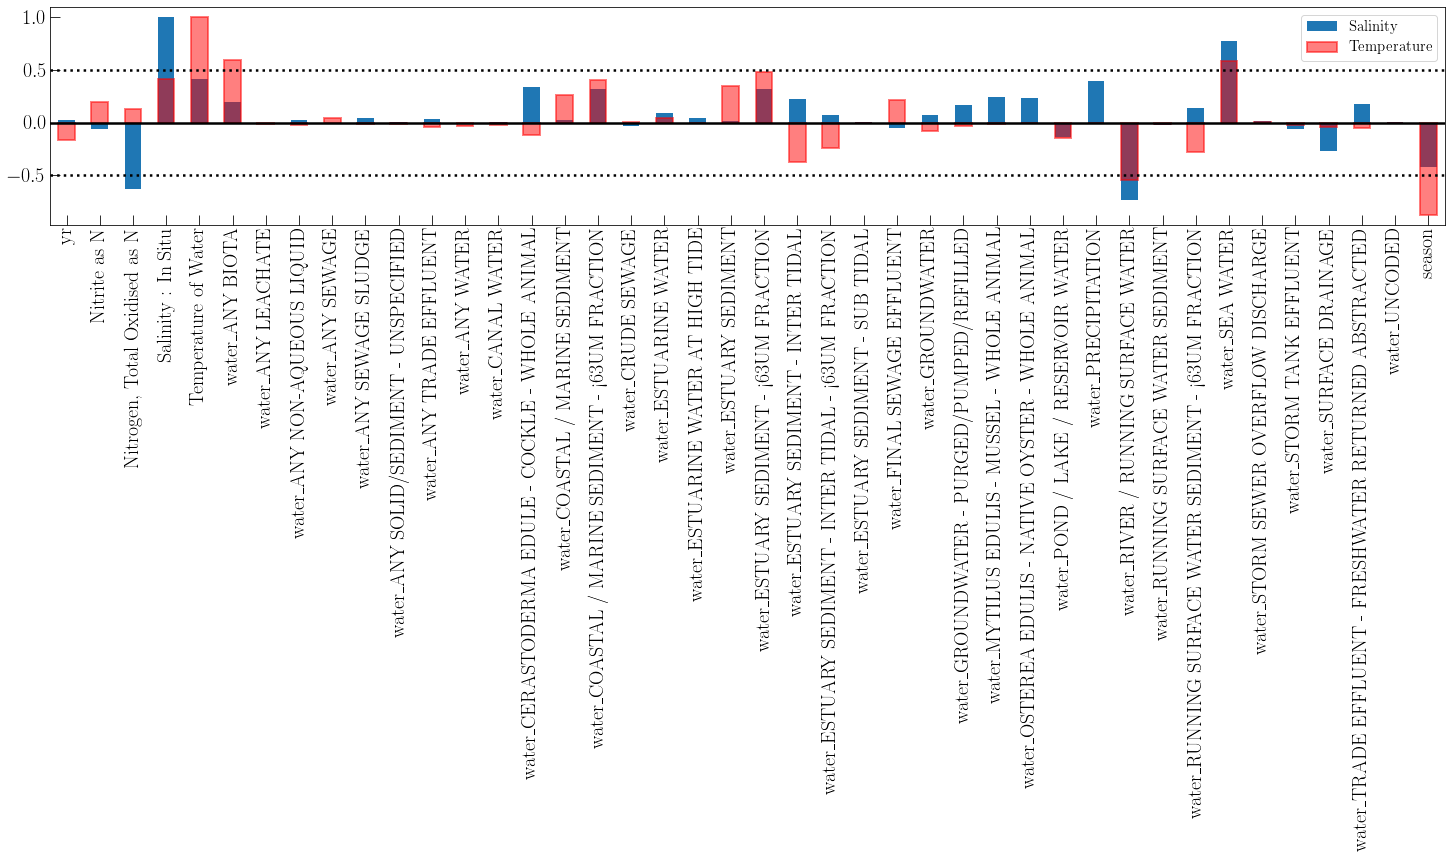

In [42]:
corrmat.corr()['Salinity : In Situ'].plot.bar(figsize=(25,4), alpha=1, label="Salinity")
corrmat.corr()['Temperature of Water'].plot.bar(figsize=(25,4), alpha=0.5, color="red", edgecolor="red", linewidth=2, label="Temperature")
plt.axhline(y=0, color="black")
plt.axhline(y=0.5, color="black", linestyle=":")
plt.axhline(y=-0.5, color="black", linestyle=":")
plt.legend(fontsize=15)

In [43]:
corrmat = df_sub_piv_nans.drop(columns=df_sub_piv_nans.columns[1:2]).corr().dropna(how="all", axis="columns").dropna(how="all", axis="rows")





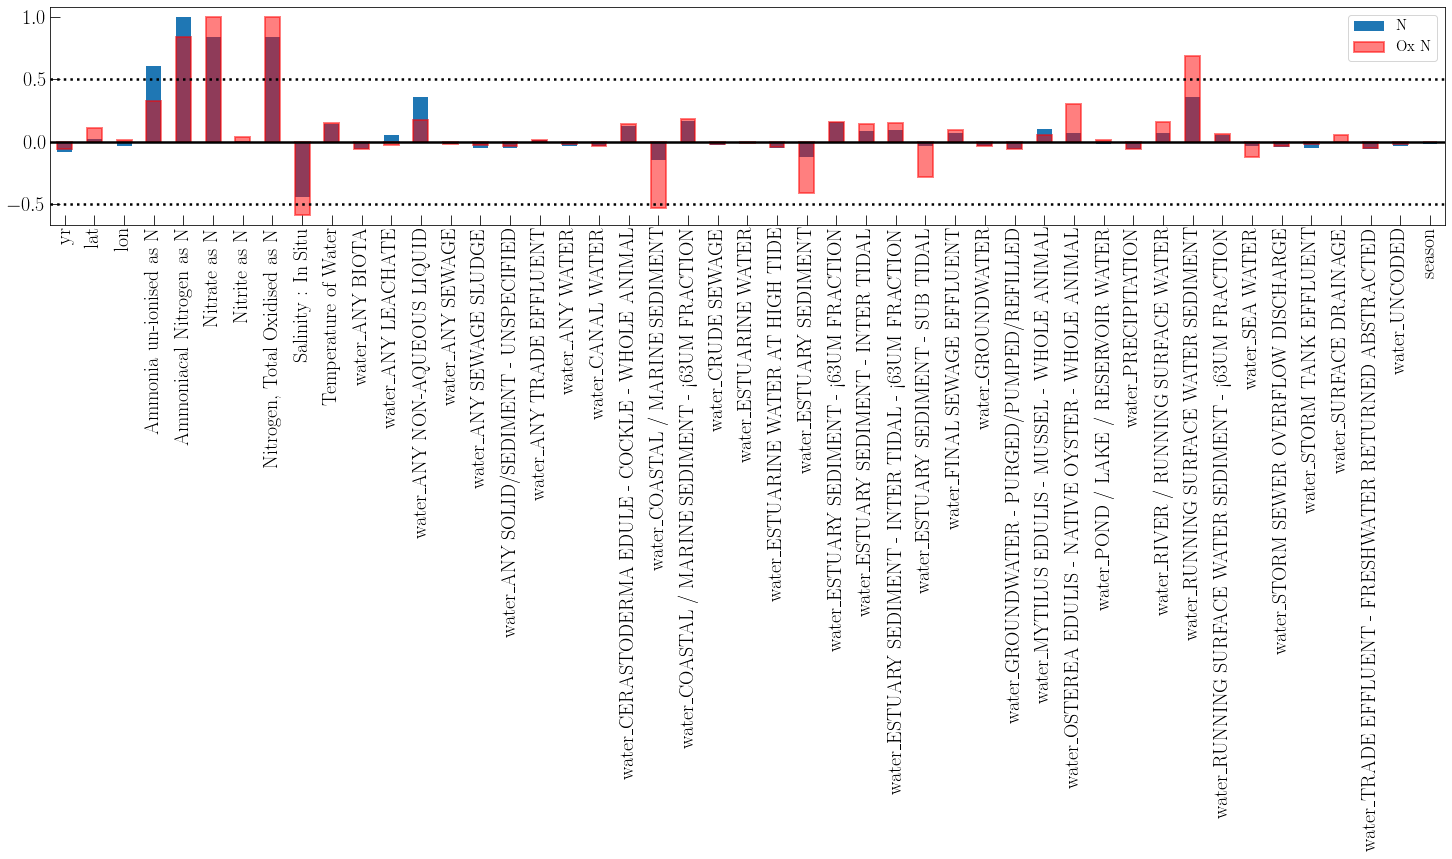

In [44]:
corrmat.corr()['Ammoniacal Nitrogen as N'].plot.bar(figsize=(25,4), alpha=1, label="N")
corrmat.corr()['Nitrogen, Total Oxidised as N'].plot.bar(figsize=(25,4), alpha=0.5, color="red", edgecolor="red", linewidth=2, label="Ox N")

plt.legend(fontsize=15)
plt.axhline(y=0, color="black")
plt.axhline(y=0.5, color="black", linestyle=":")
plt.axhline(y=-0.5, color="black", linestyle=":")

#### This shows that we do not have any particular correlation between type of water and water properties

# Rivers in England

In [45]:
import folium


In [46]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

In [47]:
rivers = gpd.read_file('/home/nannil/WaterQuality/data/HydroNode.shp')


In [48]:
rivers_course = gpd.read_file('/home/nannil/WaterQuality/data/WatercourseLink.shp')


In [49]:
rivers = rivers.to_crs(4326)
rivers_course = rivers_course.to_crs(4326)

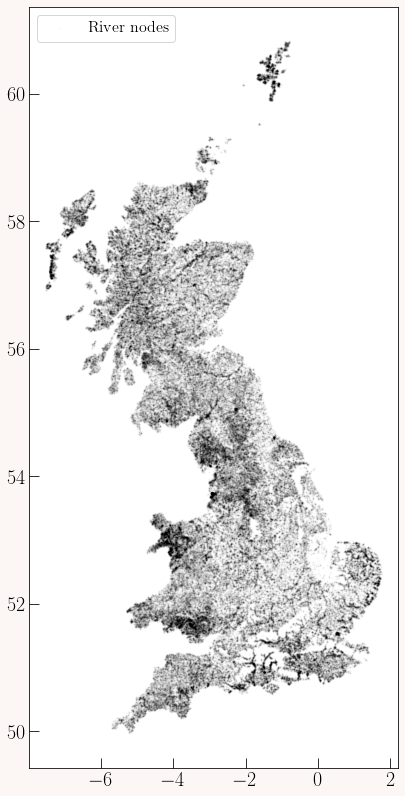

In [50]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(10, 14)
rivers.plot(ax = ax, color='black', markersize=1, alpha=0.03, label="River nodes")
plt.legend(fontsize=16)
plt.show()

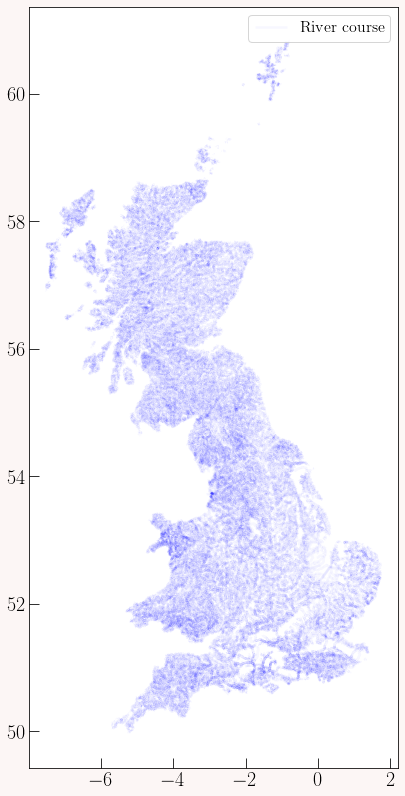

In [51]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(10, 14)
rivers_course.plot(ax = ax, color='blue', markersize=1, alpha=0.03, label="River course")
plt.legend(fontsize=16)

plt.show()

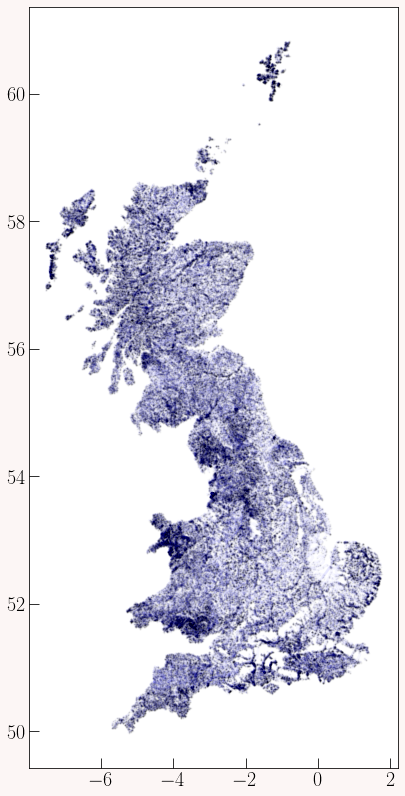

In [52]:

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(10, 14)
rivers_course.plot(ax = ax, color='blue', markersize=1, alpha=0.03)
rivers.plot(ax = ax, color='black', markersize=1, alpha=0.03)

plt.show()

# Looking at a particular area, e.g. Portsmouth

In [53]:
uk_district = gpd.read_file('/home/nannil/WaterQuality/Distribution/Districts.shp')


PO_district_oi = ["PO1", "PO2", "PO3", "PO5", "PO4", "PO6", "PO9", "PO10", "PO11"]

PO_district = uk_district[(uk_district['name'].isin(PO_district_oi) )].geometry

PO_district = PO_district.to_crs(4326)

<AxesSubplot:>

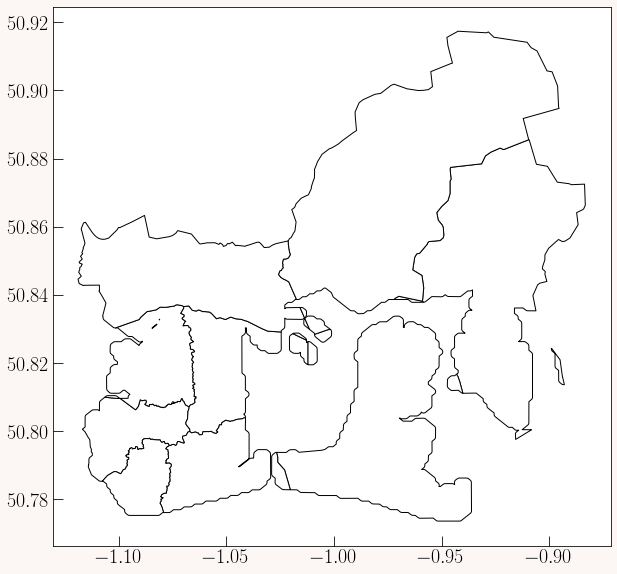

In [54]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(10, 14)
PO_district.plot(ax = ax, color='white', edgecolor='black')


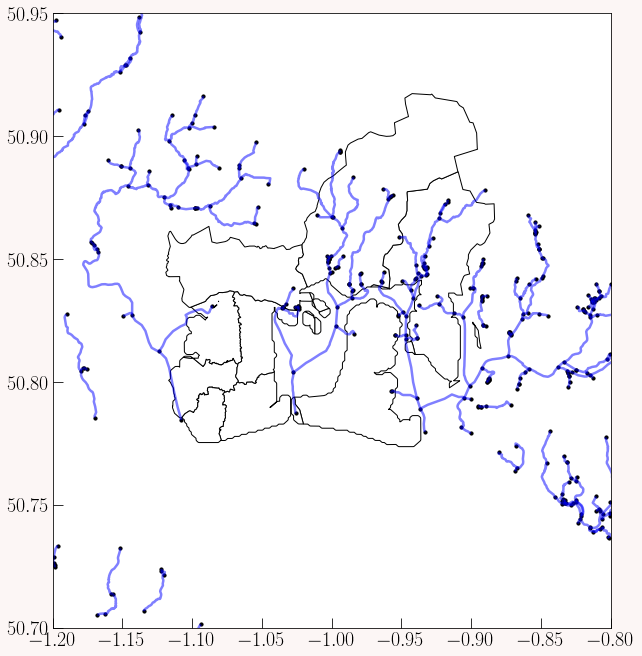

In [55]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(10, 14)

PO_district.plot(ax = ax, color='white', edgecolor='black')
rivers_course.plot(ax = ax, color='blue', markersize=1, alpha=0.5)
rivers.plot(ax = ax, color='black', markersize=10, alpha=1)

plt.xlim(-1.20, -0.8)
plt.ylim(50.7, 50.95)
plt.show()

In [56]:
mask_location = []

for i in range(len(PO_district)):
    mask_location.append(np.where(rivers.geometry.within(PO_district.iloc[i])==True))


In [57]:
mask_location_course = []

for i in range(len(PO_district)):
    mask_location_course.append(np.where(rivers_course.geometry.intersects(PO_district.iloc[i])==True))


In [58]:
mask_location = np.concatenate((mask_location), axis=1)

In [59]:
mask_location_course = np.concatenate((mask_location_course), axis=1)

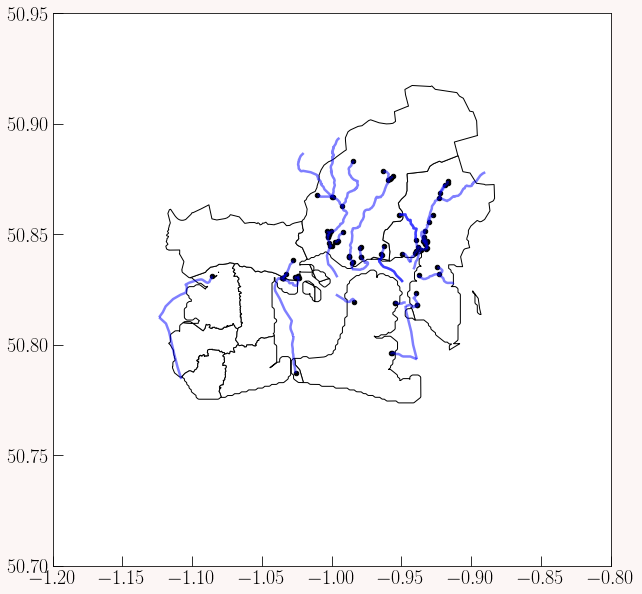

In [60]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(10, 14)

PO_district.plot(ax = ax, color='white', edgecolor='black')
rivers_course.iloc[mask_location_course.flatten()].plot(ax = ax, color='blue', markersize=10, alpha=0.5)
rivers.iloc[mask_location.flatten()].plot(ax = ax, color='black', markersize=20, alpha=1)

plt.xlim(-1.20, -0.8)
plt.ylim(50.7, 50.95)
plt.show()

### Selecting the points we want to analyse, constructing a polygon which containes them

In [61]:
list_loc_langstone_estuary = ["SO-G0003493", "SO-G0016920","SO-G0003484","SO-G0016918","SO-G0015927",\
                              "SO-G0003468","SO-G0003467","SO-G0016921"]

list_loc_langstone_freshwater = ["SO-G0003616", "SO-G0003625"]


list_loc_langstone_bkg = ["SO-G0003368", "SO-G0003508","SO-G0003484","SO-G0016873","SO-Y0003370"]




In [62]:
df_langstone_report = \
df_sub_piv_nans \
[df_sub_piv_nans["place"].isin(list_loc_langstone_estuary)| \
 df_sub_piv_nans["place"].isin(list_loc_langstone_freshwater) | \
  df_sub_piv_nans["place"].isin(list_loc_langstone_bkg)]

In [63]:
gdf_ll = gpd.GeoDataFrame(geometry=gpd.points_from_xy(df_langstone_report["lat"], \
                                                      df_langstone_report["lon"]))


In [64]:
from shapely.geometry import Polygon


In [65]:

polygon_geom = Polygon(gdf_ll.envelope)
crs = 'epsg:4326'
polygon = gpd.GeoDataFrame(index=[0], crs=crs, geometry=[polygon_geom]).convex_hull   



import folium
m = folium.Map([50.80, -1.0], zoom_start=10.48)
folium.GeoJson(polygon).add_to(m)
folium.LatLngPopup().add_to(m)
m

### Selecting river courses and river nodes contained in the area

In [66]:
mask_location = np.where(rivers.geometry.within(polygon.iloc[0])==True)
mask_location_course = (np.where(rivers_course.geometry.intersects(polygon.iloc[0])==True))



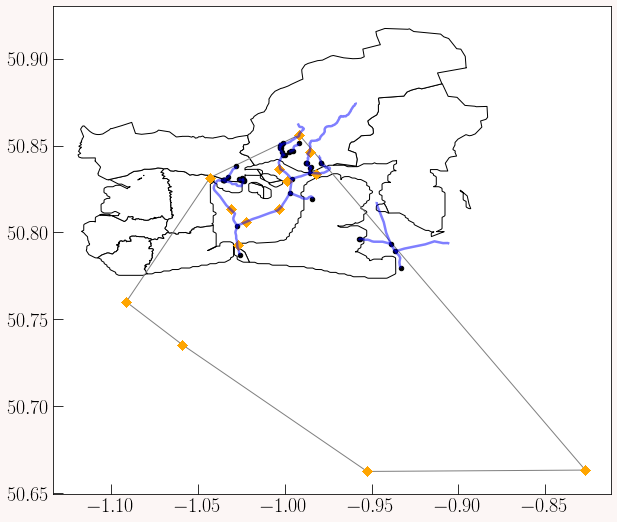

In [67]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(10, 20)

PO_district.plot(ax = ax, color='white', edgecolor='black')
polygon.plot(ax = ax, color='None', edgecolor='grey')

rivers_course.iloc[mask_location_course].plot(ax = ax, color='blue', markersize=10, alpha=0.5)
rivers.iloc[mask_location].plot(ax = ax, color='black', markersize=20, alpha=1)
gdf_ll.plot(ax=ax, color='orange', markersize=35, marker="D")




plt.show()

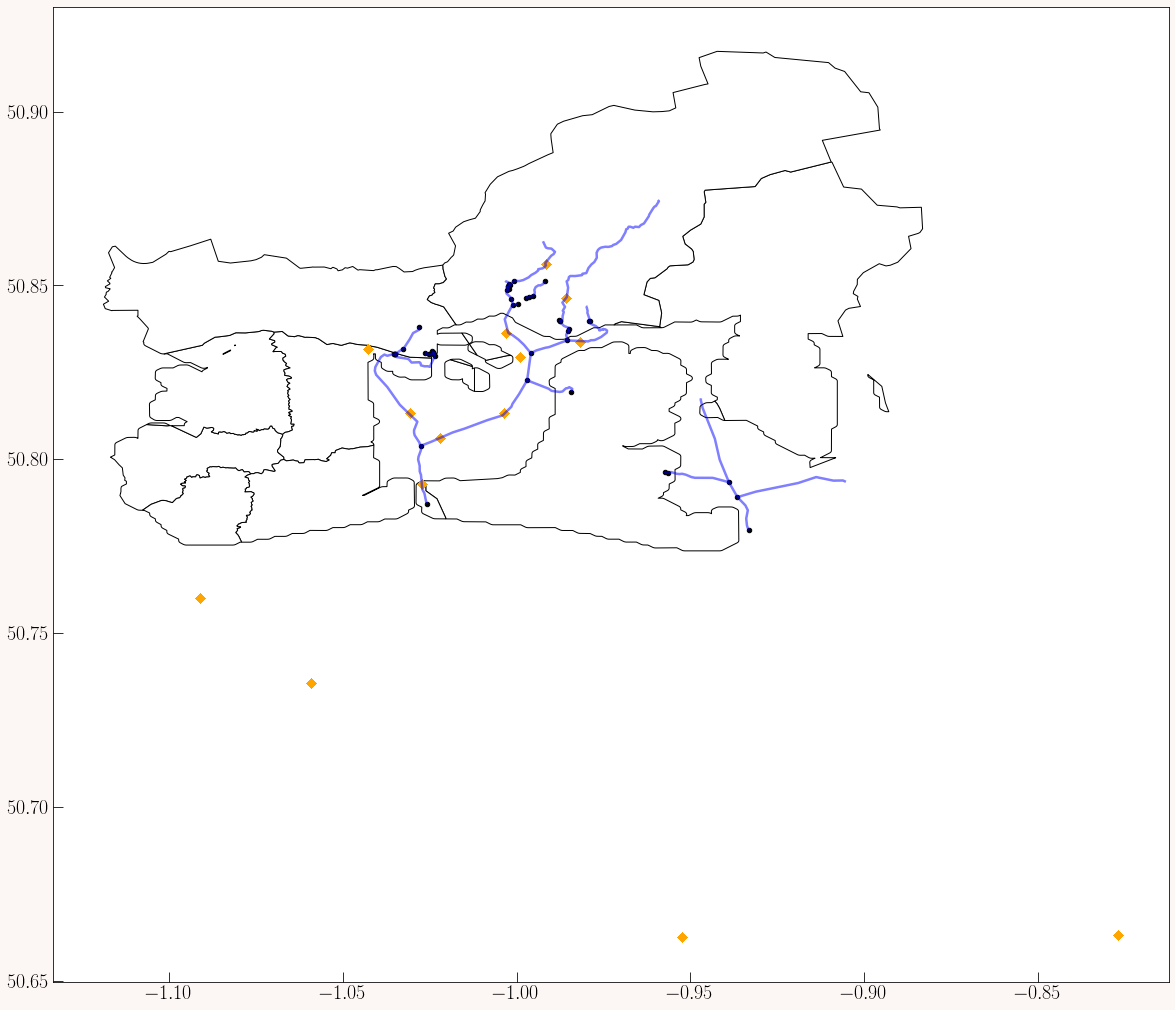

In [68]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(20, 20)

PO_district.plot(ax = ax, color='white', edgecolor='black')

rivers_course.iloc[mask_location_course].plot(ax = ax, color='blue', markersize=10, alpha=0.5)
rivers.iloc[mask_location].plot(ax = ax, color='black', markersize=20, alpha=1)
gdf_ll.plot(ax=ax, color='orange', markersize=35, marker="D")




plt.show()

In [69]:
# verificare se un punto e sul river e between gli stessi due punti

In [70]:
rivers_course.iloc[mask_location_course]

,name1,identifier,startNode,endNode,form,flow,fictitious,length,name2,geometry
140398,Emsworth Channel,E0BC1C42-6BE9-4601-999A-FE4C72FDE4D2,E7299E24-8541-4360-A8D6-033CE68F5DB0,692E693F-1836-4485-AD28-E5B2D5508C6F,tidalRiver,in direction,false,2748,None,"LINESTRING Z (-0.94697 50.81754 0.00000, -0.94..."
140401,None,5CE7AB31-9806-4529-8B9E-078B82BD45FD,692E693F-1836-4485-AD28-E5B2D5508C6F,6150006D-3588-4016-8519-EA6F1E90B2E1,tidalRiver,in direction,false,509,None,"LINESTRING Z (-0.93894 50.79341 0.00000, -0.93..."
140402,Chichester Channel,03DD4FA2-C436-4313-9DBE-57ACCCFED7FC,DFC08D4B-B2AF-46A5-8CF4-76D4249AF8B7,6150006D-3588-4016-8519-EA6F1E90B2E1,tidalRiver,in direction,false,2360,None,"LINESTRING Z (-0.90528 50.79352 0.00000, -0.90..."
140403,Emsworth Channel,AA857B50-59FF-4846-A157-521B8291DB00,6150006D-3588-4016-8519-EA6F1E90B2E1,3E97C274-843E-4721-B509-2786607B49C3,tidalRiver,in direction,false,1114,None,"LINESTRING Z (-0.93648 50.78911 0.00000, -0.93..."
140414,Dip Rithe,4CD94F0F-05D6-44BC-B1E1-75707BFE3790,70E15415-4E64-496F-94CE-2ABAFC6C5543,692E693F-1836-4485-AD28-E5B2D5508C6F,tidalRiver,in direction,false,1317,None,"LINESTRING Z (-0.95650 50.79611 0.00000, -0.95..."
140415,None,AADED317-34C5-45BD-9888-1067AC8824B0,AFAB9763-4D73-4517-ADD1-D9D689DC362D,70E15415-4E64-496F-94CE-2ABAFC6C5543,inlandRiver,in direction,false,84,None,"LINESTRING Z (-0.95739 50.79647 0.00000, -0.95..."
140424,None,A3F66492-BBB7-4029-983D-8825C0D72707,3EE02762-78C7-487E-B6BD-99F9B4AE2FD1,F39A8F46-32A4-46B0-8CF9-26176D9F2933,lake,in direction,false,10,None,"LINESTRING Z (-0.97901 50.83980 0.00000, -0.97..."
140425,None,724577ED-37D6-4505-B8BA-99337E5C2FAC,93E1ECC9-D79F-47B3-9F1F-5FA368C1ADC5,3EE02762-78C7-487E-B6BD-99F9B4AE2FD1,inlandRiver,in direction,false,480,None,"LINESTRING Z (-0.97956 50.84393 0.00000, -0.97..."
140429,None,75E9014B-4069-48B8-B8D6-49264941C813,B70C09C8-865B-4D58-A0C2-F0D636278978,DD447F81-49EE-41FB-BB9D-64230B02EB1F,inlandRiver,in direction,false,4962,None,"LINESTRING Z (-0.95938 50.87459 0.00000, -0.95..."
140430,None,FB5918DE-AD74-4621-B4AA-417C6624B1B4,D02E0FF0-7BAC-46A0-A4D6-FC6BEC26C4FF,AFC595AA-345F-4633-BBE9-AD60E94A985B,tidalRiver,in direction,false,107,None,"LINESTRING Z (-0.99968 50.84473 0.00000, -1.00..."


### Expanding the extension of the locations we are interested in

In [71]:
gdf_ll_buff = gdf_ll.copy()

In [72]:
lang_riv = rivers_course.iloc[mask_location_course].to_crs(4326)

In [73]:
gdf_ll_buff['geometry'] = gdf_ll.geometry.buffer(0.0045)
# is a radius in lat-long!!!!

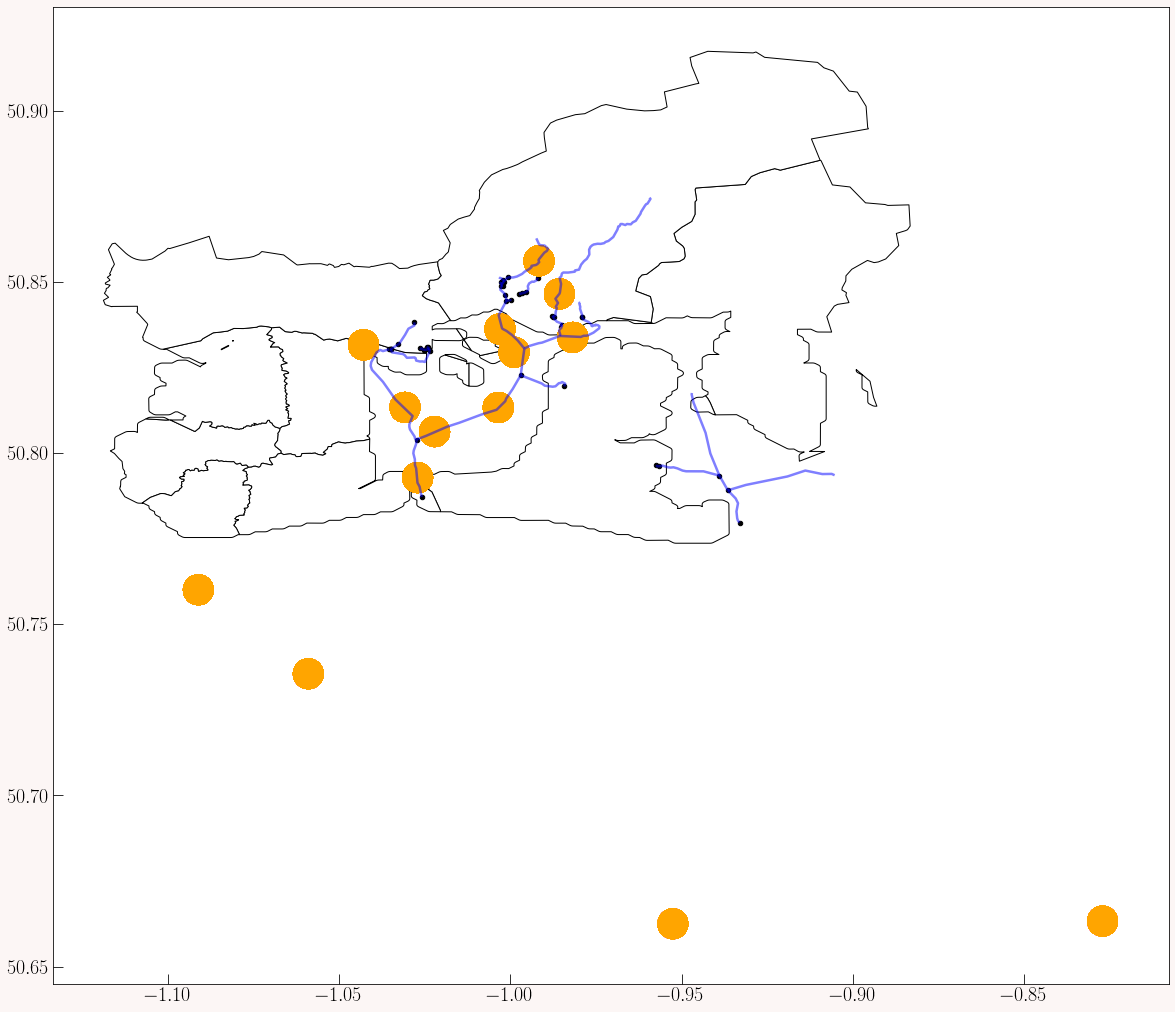

In [74]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(20, 20)

PO_district.plot(ax = ax, color='white', edgecolor='black')

rivers_course.iloc[mask_location_course].plot(ax = ax, color='blue', markersize=10, alpha=0.5)
rivers.iloc[mask_location].plot(ax = ax, color='black', markersize=20, alpha=1)
gdf_ll_buff.plot(ax=ax, color='orange')




plt.show()

### Checking in which river course our locations are

In [75]:
join = gpd.sjoin(gdf_ll_buff, lang_riv, how = 'inner', op ='intersects')


/home/nannil/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/home/nannil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  """Entry point for launching an IPython kernel.


In [76]:
#colors_new = cm.Spectral(np.linspace(0, 1, len(np.unique(join["index_right"].values))))
colors_new = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080']

In [77]:
for i in range(len(np.unique(join["index_right"].values))):

    print("same river:", np.unique(df_langstone_report.iloc[join[join["index_right"].values==np.unique(join["index_right"].values)[i]].index]["place"]))

same river: ['SO-G0003616']
same river: ['SO-G0003625']
same river: ['SO-G0015927' 'SO-G0016920']
same river: ['SO-G0003468']
same river: ['SO-G0003468' 'SO-G0016921']
same river: ['SO-G0003467' 'SO-G0003468']
same river: ['SO-G0003467']
same river: ['SO-G0003467']
same river: ['SO-G0003493']
same river: ['SO-G0003484' 'SO-G0016918']


#### we have 4 couples of locations on the same river courses in Langstone area

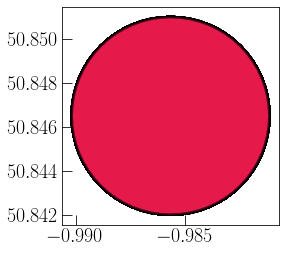

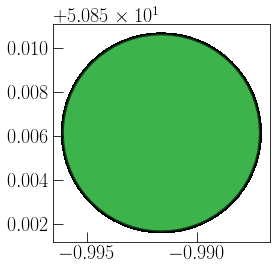

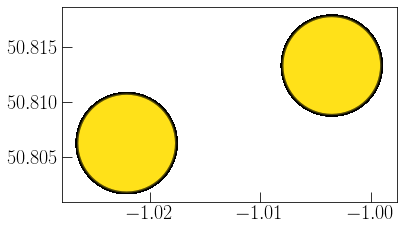

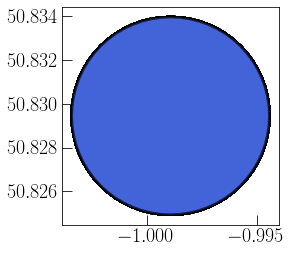

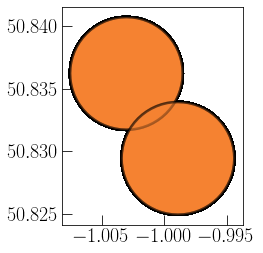

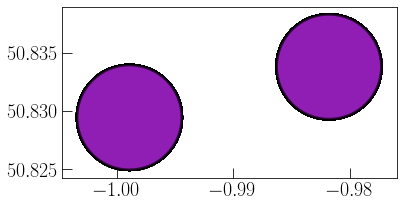

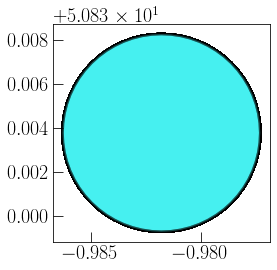

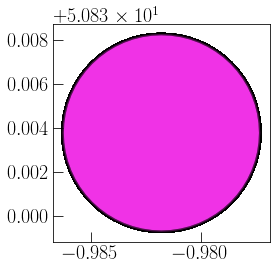

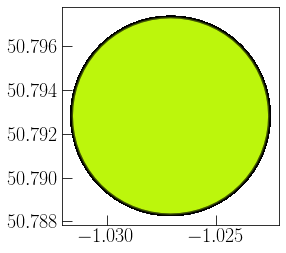

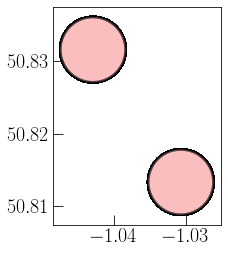

In [78]:
for i in range(len(np.unique(join["index_right"].values))):
    ax = gdf_ll_buff.iloc[join[join["index_right"].values == np.unique(join["index_right"].values)[i]].index]\
    .plot( facecolor=colors_new[i], edgecolor="black", linewidth=2.5, markersize=10, alpha =0.5, \
         label=str(np.unique(df_langstone_report.iloc[join[join["index_right"].values==np.unique(join["index_right"].values)[i]].index]["place"])))


plt.show()

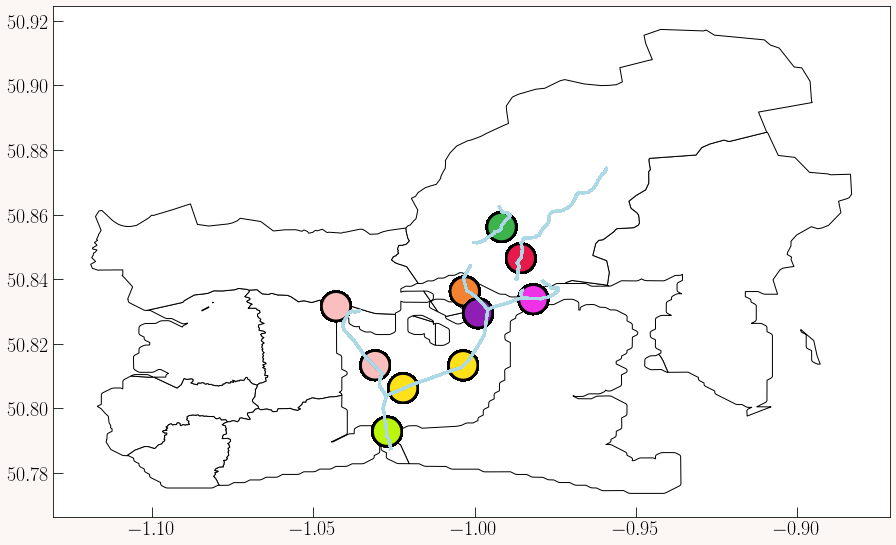

In [79]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(15, 10)

PO_district.plot(ax = ax, color='white', edgecolor='black')


for i in range(len(np.unique(join["index_right"].values))):
    lang_riv.loc[join[join["index_right"].values==np.unique(join["index_right"].values)[i]]["index_right"]].plot(ax = ax, color='lightblue', markersize=20, alpha=1)
    gdf_ll_buff.iloc[join[join["index_right"].values == np.unique(join["index_right"].values)[i]].index]\
    .plot(ax=ax,  facecolor=colors_new[i], edgecolor="black", linewidth=2.5)
    
    
    


<AxesSubplot:>

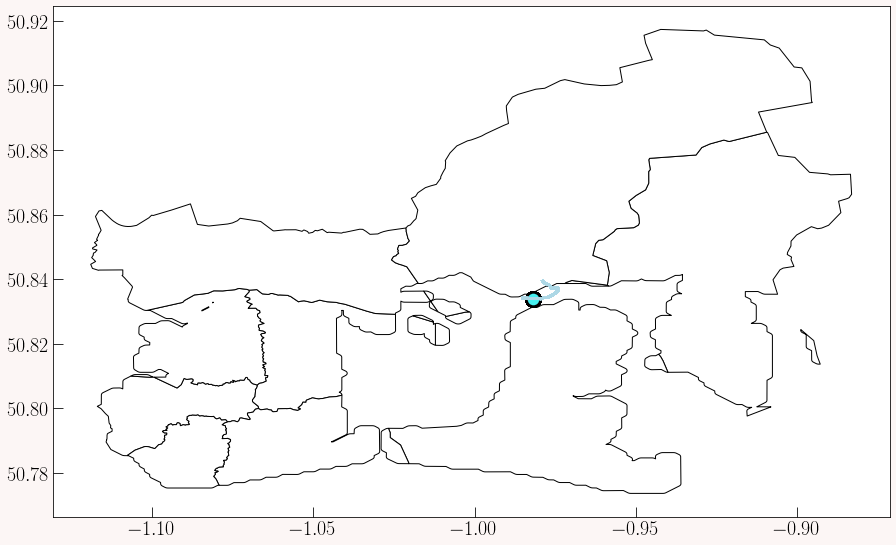

In [80]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(15, 10)

PO_district.plot(ax = ax, color='white', edgecolor='black')


lang_riv.loc[join[join["index_right"].values==np.unique(join["index_right"].values)[6]]["index_right"]].plot(ax = ax, color='lightblue', markersize=20, alpha=1)
gdf_ll.iloc[join[join["index_right"].values == np.unique(join["index_right"].values)[6]].index]\
    .plot(ax=ax,  facecolor=colors_new[6], edgecolor="black", linewidth=2.5, markersize=200)

<AxesSubplot:>

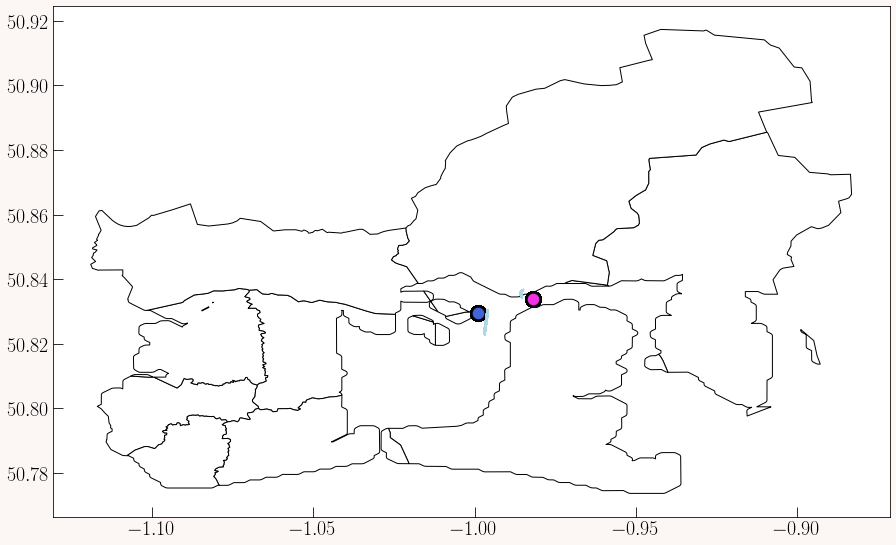

In [81]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(15, 10)

PO_district.plot(ax = ax, color='white', edgecolor='black')


lang_riv.loc[join[join["index_right"].values==np.unique(join["index_right"].values)[3]]["index_right"]].plot(ax = ax, color='lightblue', markersize=20, alpha=1)
gdf_ll.iloc[join[join["index_right"].values == np.unique(join["index_right"].values)[3]].index]\
    .plot(ax=ax,  facecolor=colors_new[3], edgecolor="black", linewidth=2.5, markersize=200)


lang_riv.loc[join[join["index_right"].values==np.unique(join["index_right"].values)[7]]["index_right"]].plot(ax = ax, color='lightblue', markersize=20, alpha=1)
gdf_ll.iloc[join[join["index_right"].values == np.unique(join["index_right"].values)[7]].index]\
    .plot(ax=ax,  facecolor=colors_new[7], edgecolor="black", linewidth=2.5, markersize=200)

### Look at the nutrients in the area taking into acount the locations along the rivers

In [86]:
import plotting_time as pl


In [87]:
color_N = ["#0B262D", "#055B61", "#36ABA1","#58B081", "#8BC07E", "#DCF059", "#F6FF4C", "#DBB63E", "#C06C2F", \
          "#B54820", "#952902", "#360F00"]

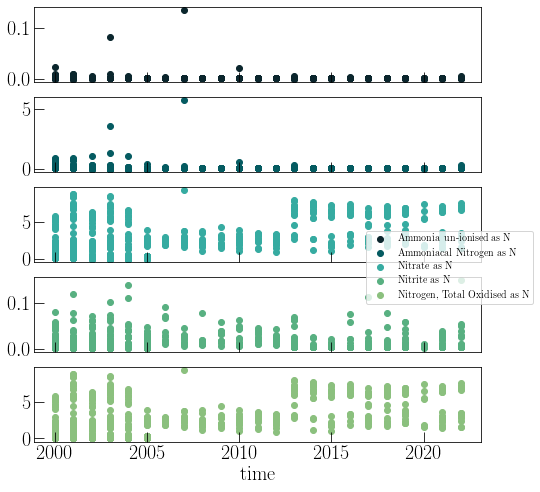

In [90]:
fig = pl.plot_Nvst_all(df_langstone_report, df_langstone_report.columns[6:11], \
          df_langstone_report.columns[6:11], "")

In [97]:
loc_on_river = []

for i in range(len(np.unique(join["index_right"].values))):
    place_on_river = np.unique(df_langstone_report.iloc[join[join["index_right"].values==np.unique(join["index_right"].values)[i]].index]["place"])
    if len(place_on_river)>1:
        loc_on_river.append(place_on_river)

In [102]:
loc_on_river[0][0]

'SO-G0015927'

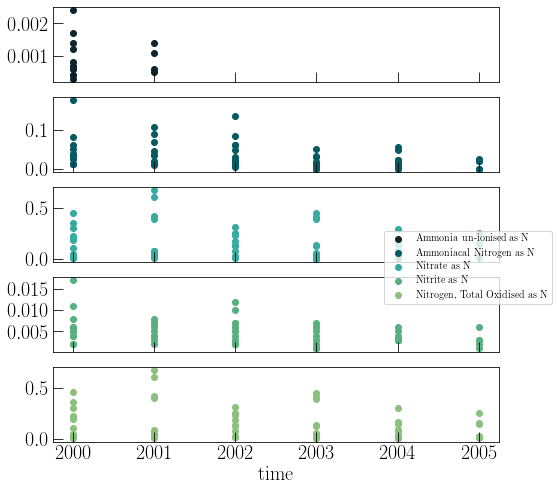

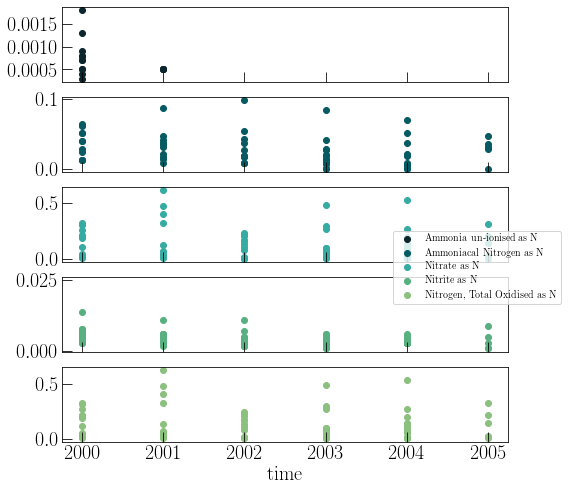

In [103]:
pl.plot_Nvst_all(df_langstone_report[df_langstone_report["place"] == loc_on_river[0][0]], df_langstone_report.columns[6:11], \
          df_langstone_report.columns[6:11], "")
        
pl.plot_Nvst_all(df_langstone_report[df_langstone_report["place"] == loc_on_river[0][1]], df_langstone_report.columns[6:11], \
          df_langstone_report.columns[6:11], "")

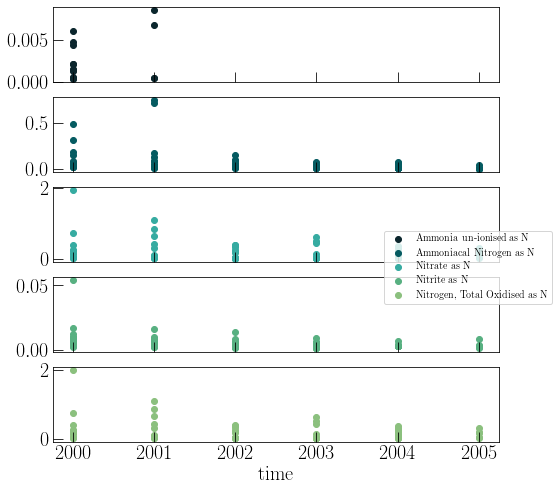

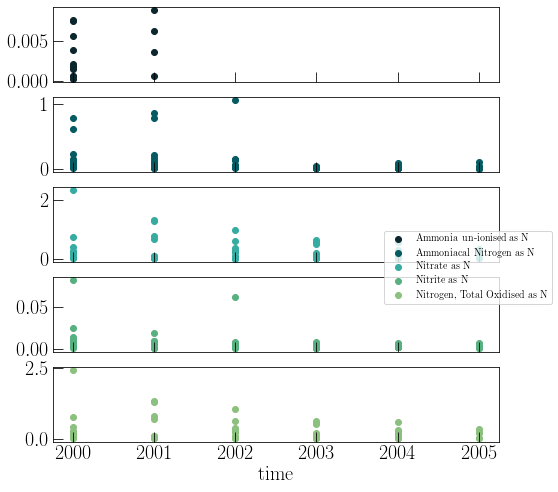

In [104]:
pl.plot_Nvst_all(df_langstone_report[df_langstone_report["place"] == loc_on_river[1][0]], df_langstone_report.columns[6:11], \
          df_langstone_report.columns[6:11], "")
        
pl.plot_Nvst_all(df_langstone_report[df_langstone_report["place"] == loc_on_river[1][1]], df_langstone_report.columns[6:11], \
          df_langstone_report.columns[6:11], "")

In [108]:
df_langstone_report[df_langstone_report["place"] == loc_on_river[0][0]]["Date"]

174063    2000-02-02
174064    2000-02-28
174088    2000-03-28
174095    2000-04-26
174101    2000-05-26
             ...    
174122    2022-05-17
174144    2022-06-12
174166    2022-07-13
174188    2022-08-12
174209    2022-09-10
Name: Date, Length: 189, dtype: object

In [107]:
df_langstone_report[df_langstone_report["place"] == loc_on_river[0][1]]["Date"]

175906    2000-02-02
175907    2000-02-28
175931    2000-03-28
175938    2000-04-26
175944    2000-05-26
             ...    
175965    2022-05-17
175987    2022-06-12
176009    2022-07-13
176031    2022-08-12
176052    2022-09-10
Name: Date, Length: 189, dtype: object